# PROJECT OVERVIEW

I used data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

# BUSINESS PROBLEM

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# BUSINESS UNDERSTANDING

From the above problem I deduced that the company plans to enter the aviation industry but lacks sufficient knowledge about aircraft operations,accident histories and manufacture reliability.Thus my analysis focuses on understanding the most common causes of accidents, highlighting aircraft shortcomings and evaluating the safety records of different manufacturers.This will enable the company to minimizs risk, select the most reliable aircrafts and build a strong foundation in the aviation industry.

# THE DATA


In the data folder is a datasetLinks to an external site(https://www.kaggle.com/datasets/drealbash/aviation-accident-from-1919-2023/data) from the National Transportation Safety Board that includes aviation accident data from 1919 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

Step 1:


# Data Cleaning

My first step is to import the necessary packages required for analysis.

In [505]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
import datetime

My next step is to load my csv dataset; the aviation-accident-data thus realising the dataset I have to work with :

In [506]:
data = pd.read_csv('aviation-accident-data-2023-05-16.csv')
data.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


This was then followed by confirming the datatypes and how many nulls we have :

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


From the above information, we can deduce that all the fields are objects. However I'm considering changing the date, fatalities and year to different datatypes.
There are 23967 entries thus every row should have such amounts of non-null values however, registration, operator, fatalities and location are all showing that  null values are evident.
In order to not exclude alot of information, I plan to look at each case individually rather than blindly removing rows with null values.


How about before diving into the null value section , we first confirm that the rest of the columns make sense.
For this I have decided to first look closer into countries section and that they make sense.

In [508]:
data.country.unique()

array(['Unknown country', 'Russia', 'Eritrea', 'Libya', 'Poland', '?',
       'India', 'Bulgaria', 'Bahamas', 'Zimbabwe', 'Mauritania', 'Cyprus',
       'Mexico', 'New Caledonia', 'Honduras', 'Peru', 'Kenya',
       'Antarctica', 'Latvia', 'Yemen', 'Ukraine', 'France', 'Liberia',
       'Italy', 'U.K.', 'South Africa', 'Sudan', 'Sweden', 'Cuba',
       'Belgium', 'China', 'Atlantic Ocean', 'Netherlands', 'Germany',
       'USA', 'Iran', 'Chile', 'Israel', 'Argentina', 'P.N. Guinea',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Bolivia', 'Spain',
       'Australia', 'Iraq', 'Guatemala', 'Malta', 'Colombia',
       'Switzerland', 'Austria', 'Uganda', 'Trinidad & Tobago', 'Norway',
       'Greece', 'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco',
       'Pacific Ocean', 'Hungary', 'Jamaica', 'Japan', 'Canada', 'Gambia',
       'Thailand', 'Philippines', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Si

Upon further scrutiny, I realised that 'Unknown Country' and '?' are entries in the country field.Before removing these entries altogether I decided to rather take a look at the '?' countries first before truncating.

Looking at the '?' countires

In [509]:
missing_counrty = data.loc[(data['country'] == '?')]
missing_counrty

,date,type,registration,operator,fatalities,location,country,cat,year
16,date unk.,Antonov An-2T,CCCP-28909,"Aeroflot, Azerbaijan",0,NaN,?,O1,unknown
17,date unk.,Antonov An-2T,CCCP-98313,"Aeroflot, Azerbaijan",0,NaN,?,O1,unknown
18,date unk.,Antonov An-2T,CCCP-28895,"Aeroflot, Azerbaijan",0,NaN,?,O1,unknown
19,date unk.,Antonov An-2T,CCCP-35494,"Aeroflot, Azerbaijan",0,NaN,?,O1,unknown
1264,23-JUL-1942,Lisunov PS-84,CCCP-L3461,"Aeroflot, Azov-Black Sea",NaN,NaN,?,A1,1942
1270,01-AUG-1942,Lisunov PS-84,CCCP-L3419,"Aeroflot, MAGON",NaN,NaN,?,A2,1942
3001,29-FEB-1944,Junkers Ju-52/3m,NaN,German AF,4,between Tiraspol...,?,A1,1944
6334,06-OCT-1949,Lisunov Li-2,CCCP-L4545,"Aeroflot, Northern",NaN,NaN,?,A1,1949
8695,29-AUG-1959,Lisunov Li-2,CCCP-84598,"Aeroflot, East Siberia",NaN,NaN,?,A1,1959
8734,19-NOV-1959,Lisunov Li-2,CCCP-84633,"Aeroflot, Far East",NaN,NaN,?,A1,1959


Thus from the above observation there are 19 of these '?' countries with most having zero fatalities.

In as much as it would be okay to exclude them from our dataset, lets first look into the 'Unknown Country'.

In [510]:
unkown_country = data.loc[(data['country'] == 'Unknown Country')]

My next initiative is to then replace the '?' with 'Unknown Country' for uniformity.
I'll decide whether to completely remove them after sorting out the dates since it says 'date unk.'

In [511]:
data['country'] = data['country'].replace('?', 'Unknown Country')
data.iloc[:25]

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


I am planning to consider the rows that have nulls rather than removing them from my dataset.

Rather than excluding all rows with all information except location, I replaced the null values with 'unknown'

In [512]:
data.registration = data.registration.fillna('unknown')
data.location = data.location.fillna('unknown')
data.date = data.date.fillna('date unk.')
data.operator = data.operator.fillna('unknown') 

data.iloc[:25]

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,unknown,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,unknown,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,unknown,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,unknown,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,unknown,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,unknown,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


Since entries with an unknown year are not reliable datapoints for the analysis I have planned, I'd like to exclude those entries.

In [513]:
data = data.loc[(data.year != 'unknown')]

data.iloc[:10]  

,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,unknown,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
67,15-JAN-1921,Aeromarine 75,unknown,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921
68,02-MAR-1921,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921
69,04-MAR-1921,Caproni Ca.60 Noviplano,unknown,Caproni,0,Lago Maggiore,Italy,A1,1921
70,26-AUG-1921,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921


It is evident that removing unknown years resolved other missing fields too.Since I've removed the unknown values, I'd further change the datatype to an INT64

In [514]:
data['year'] = pd.to_numeric(data['year'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23906 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23906 non-null  object
 1   type          23906 non-null  object
 2   registration  23906 non-null  object
 3   operator      23906 non-null  object
 4   fatalities    20004 non-null  object
 5   location      23906 non-null  object
 6   country       23906 non-null  object
 7   cat           23906 non-null  object
 8   year          23906 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


My Next step was to change my date field into date object type.

However, using to_datetime to change the datatype proved troublesome, giving an error and inconsistent formats.

Thus I decided to use pandad with "errors='coerce'" in order to:


1.Convert valid strings to date objects

2.Turn unparsable entries into 'NaT'

3.Replace 'NaT' with a placeholder string for readability.

In [515]:
#Use pd.to_datetimedirectly with errors='coerce' to handle inconsistent formats
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date
#Replace NaT with a placeholder string for readability  
data['date'] = data['date'].fillna('date unk.')

data.iloc[:23]

,date,type,registration,operator,fatalities,location,country,cat,year
61,1919-08-02,Caproni Ca.48,unknown,Caproni,14,Verona,Italy,A1,1919
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
67,1921-01-15,Aeromarine 75,unknown,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921
68,1921-03-02,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921
69,1921-03-04,Caproni Ca.60 Noviplano,unknown,Caproni,0,Lago Maggiore,Italy,A1,1921
70,1921-08-26,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921


Next I dived into the fatalities column in order to know the kinds of entries there.

In [516]:
data.fatalities.unique()

array(['14', '1', '0', '4', '2', nan, '5', '6', '3', '7', '5+ 1', '8',
       '16', '12', '9', '15', '14+ 1', '10', '11', '35+ 9', '13', '2+ 2',
       '17', '19', '20', '0+ 1', '18', '13+ 1', '25', '29', '23', '5+ 7',
       '24', '36', '26', '22', '27', '12+ 1', '21', '7+ 6', '35', '32',
       '31', '2+ 1', '34', '28', '20+ 5', '0+ 2', '30', '41', '59',
       '13+ 7', '45', '44', '37', '3+ 5', '4+ 6', '30+ 1', '19+ 1', '39',
       '11+ 1', '43', '53', '0+ 3', '50', '14+ 3', '3+ 1', '52', '8+ 1',
       '5+ 3', '40', '0+ 6', '8+ 2', '33', '48', '55', '1+ 1', '38',
       '0+ 7', '32+ 1', '13+ 2', '80', '1+ 2', '46', '58', '51', '10+ 3',
       '56', '23+ 7', '29+ 4', '2+ 3', '5+ 2', '87', '129', '42', '5+ 10',
       '35+ 1', '47', '66', '1+ 4', '5+ 4', '74', '70', '62', '17+ 1',
       '4+ 3', '18+ 2', '20+ 2', '67', '79', '5+ 6', '6+ 1', '61',
       '41+ 1', '21+ 2', '99', '64', '3+ 4', '65', '1+ 9', '68', '54',
       '3+ 8', '32+ 10', '6+ 2', '63', '7+ 1', '84+ 6', '20+ 32', '

At this stage I realized that there are some '+' symbols representing fatalities on the ground as a result of the accident but not a person who is rather On the plane.

In [517]:
#Replace na with 0
data['fatalities'].fillna(0, inplace=True)

In [518]:
#Using lambda function to handle '+' in fatalities column   
data['fatalities'] = data['fatalities'].apply(lambda x: sum(map(int, x.replace(' ', '').split('+'))) if '+' in str(x) else int(x))
data.fatalities.unique()

array([  14,    1,    0,    4,    2,    5,    6,    3,    7,    8,   16,
         12,    9,   15,   10,   11,   44,   13,   17,   19,   20,   18,
         25,   29,   23,   24,   36,   26,   22,   27,   21,   35,   32,
         31,   34,   28,   30,   41,   59,   45,   37,   39,   43,   53,
         50,   52,   40,   33,   48,   55,   38,   80,   46,   58,   51,
         56,   87,  129,   42,   47,   66,   74,   70,   62,   67,   79,
         61,   99,   64,   65,   68,   54,   63,   90,   73,   78,   72,
         83,   77,   95,  111,  107,  130,  113,   84,   94,   81,   86,
         97,  101,  118,   85,   49,   57,  121,  117,  133,  124,   98,
         82,  126,   88,  102,  123,  155,  100,   96,   76,   92,  112,
        109,   75,  162,   69,   91,  104,  115,  122,  156,  174,   60,
        176,  108,  106,  346,  191,  138,  188,  154,   71,  335,  248,
        131,  213,  142,  183,  273,  257,  128,  146,  166,  301,   89,
        110,  180,  137,  132,  153,  119,  269,  1

Now that I am somewhat satisified with the cleansing, I'll start my analysis!


# Data Analysis/Visualization.

I first needed to look at the number of accidents over time and I found the line plot best suited for this.

In [519]:
#Creating variables that counts the number of entries and sorting them out in ascending order.
#Coupled with value_counts() to get the counts of each unique value in the year column.
accidents_per_year = data['year'].value_counts().sort_index()
accidents_per_year

1919      2
1920      4
1921      7
1922      3
1923      8
       ... 
2019    245
2020    203
2021    183
2022    168
2023     56
Name: year, Length: 105, dtype: int64

Now, onto the line plot!

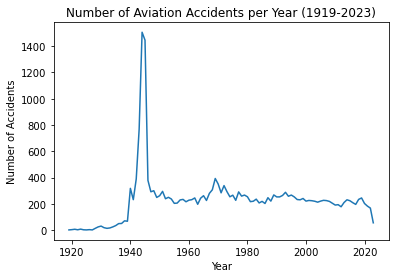

In [520]:
#pyplot prints the line plot, firt being the x-axis and the second being the y-axis.
plt.plot(accidents_per_year.index, accidents_per_year.values)
#Axis labels
plt.xlabel('Year')  
plt.ylabel('Number of Accidents')
#Title  
plt.title('Number of Aviation Accidents per Year (1919-2023)') 
plt.show()


Now, applying the same stratagem for fatalities per year yields;


In [521]:
#Creating variables aggregating fatalities for each year
#groupby() groups data by year and sum() aggregates the fatalities for each year.
fatalities_per_year = data.groupby('year')['fatalities'].sum()  
fatalities_per_year

year
1919     15
1920      4
1921      2
1922     19
1923     11
       ... 
2019    471
2020    430
2021    330
2022    288
2023     88
Name: fatalities, Length: 105, dtype: int64

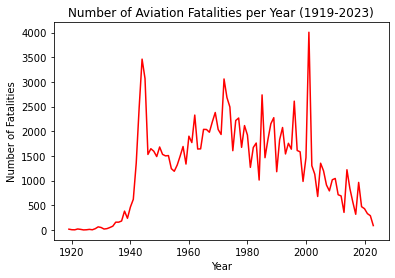

In [522]:
plt.plot(fatalities_per_year.index, fatalities_per_year.values, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Number of Aviation Fatalities per Year (1919-2023)')
plt.show()

I decided to thin out the timeframe to 1995 and onward; the past 25 years and do the same plot

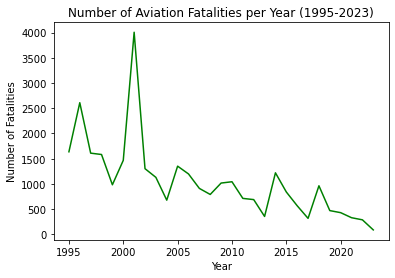

In [523]:
last_25_years = data[data['year'] >= 1995]

#Adding up fatalities for each year from 1995 onward
fatalities_last_25_years = last_25_years.groupby('year')['fatalities'].sum()

plt.plot(fatalities_last_25_years.index, fatalities_last_25_years.values, color='green')
plt.xlabel('Year')  
plt.ylabel('Number of Fatalities')
plt.title('Number of Aviation Fatalities per Year (1995-2023)')
plt.show()

Curious about the past 25 years of aircraft accidents, I decided to venture further as to what countries had the most accidents.

In [524]:
countries_25_years = last_25_years['country'].value_counts().head(10)
countries_25_years

USA           1362
Canada         333
Russia         322
Indonesia      188
Brazil         169
D.R. Congo     166
Mexico         148
U.K.           137
Venezuela      129
Colombia       123
Name: country, dtype: int64

Next I wanted to see  which countries had the highest fatalities in the past 25 years.


In [525]:
#Grouping by country and summing up fatalities for each country, sorting by number of fatalities
country_fatalities_25_years = last_25_years.groupby('country')['fatalities'].sum().sort_values(ascending=False)
country_fatalities_25_years

country
USA             4646
Russia          1940
Indonesia       1773
Iran            1369
D.R. Congo       945
                ... 
Saint Lucia        0
Burkina Faso       0
Burundi            0
Seychelles         0
Lithuania          0
Name: fatalities, Length: 205, dtype: int64

Thus within these 25 years, what operators within the US had the highest number of accidents?

In [526]:
#Narrowing down the past 25 years to just the US
USA_25_years = last_25_years[last_25_years['country'] == 'USA']

#Grouping by operator and counting the number of accidents for each operator, sorting by number of accidents
USA_operators_25_years = USA_25_years['operator'].value_counts()
USA_operators_25_years

American Airlines              36
private                        27
USAF                           25
Delta Air Lines                24
Southwest Airlines             23
                               ..
Union Gas Air Ventures I        1
Ryan Int. Airlines              1
Flight Research                 1
Rediske Air                     1
Corporate Flight Management     1
Name: operator, Length: 856, dtype: int64

There are 856 different operators which I'll narrow down to the top 10

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

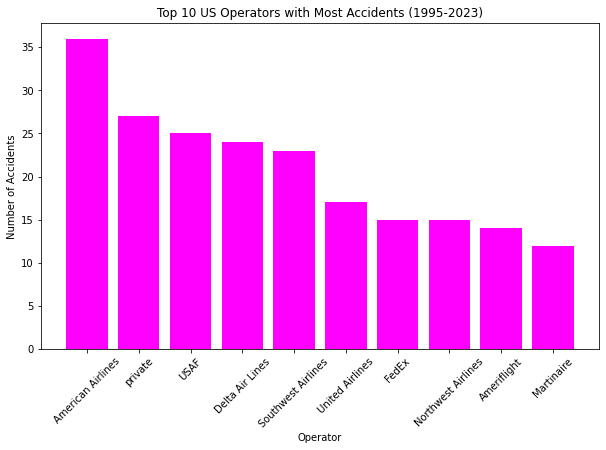

In [527]:
#Only the top 10 operators taken into account
top_10_USA_operators = USA_operators_25_years.iloc[:10]

#Show with a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_10_USA_operators.index, top_10_USA_operators.values, color='magenta')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.title('Top 10 US Operators with Most Accidents (1995-2023)')
plt.xticks(rotation=45)

This led me to wondering what airplanes within the US were involved in the most accidents?

In [528]:
#Airplanes within the US involved in the most accidents
USA_airplanes_25_years = USA_25_years['type'].value_counts()
USA_airplanes_25_years

Cessna 208B Grand Caravan        63
Cessna 208B Super Cargomaster    43
Beech 200 Super King Air         34
Learjet 35A                      30
Cessna 550 Citation II           22
                                 ..
Antonov An-24RV                   1
Boeing 747-136                    1
Grumman G-73T Turbo Mallard       1
Beech C-12C Huron                 1
Beech 200T Super King Air         1
Name: type, Length: 491, dtype: int64

This led me to wanting to split  the type into the manufacturer and model

In [529]:
USA_25_years[['Manufacturer', 'Model']] = USA_25_years['type'].str.split(' ', n=1, expand=True)
USA_25_years.Manufacturer.unique()

c:\Users\User\anaconda3\New folder\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array(['Rockwell', 'Cessna', 'Boeing', 'DC-8-63F', 'IAI', 'Beech',
       'Learjet', 'Douglas', 'Lockheed', 'Airbus', 'DC-9-32', 'Embraer',
       'Gulfstream', 'Dornier', 'Shorts', 'Saab', 'Swearingen', 'Grumman',
       'DC-9-83', 'Convair', 'MD-11', 'Dassault', 'Fairchild', 'Antonov',
       'MD-88', 'DC-10-30', 'DC-10-10CF', 'Morane', 'DHC-4A',
       'Mitsubishi', 'MD-87', 'Basler', 'ATL-98', 'DHC-6', 'MD-11F',
       'PBV-1A', 'DC-8-61F', 'MD-82', 'ATR', 'Fokker', 'AÃ©rospatiale',
       'DC-9-31', 'Ilyushin', 'CASA', 'Raytheon', 'DHC-3', 'Canadair',
       'DC-9-82', 'DC-10-10F', 'DHC-3T', 'BAe-125-700A', 'DC-8-71F',
       'DC-10-30F', 'DC-8-62F', 'BAe', 'DC-9-81', 'DC-9-51', 'Curtiss',
       'C-7A', 'Let', 'Consolidated', 'Avro', 'Hawker', 'DHC-8-401Q',
       'Sino', 'MD-10-10F', 'Volpar', 'BN-2A', 'Bushmaster', 'Howard',
       'MBB', 'DHC-8-202Q', 'Excel-Jet', 'Spectrum', 'BN-2A-20',
       'BN-2A-26', 'DC', 'Bombardier', 'Eclipse', 'BAe-125-800A', 'AMI',
       'DHC-8-402

Text(0.5, 1.0, 'Top 10 US Aircraft Manufacturers with Most Accidents (1995-2023)')

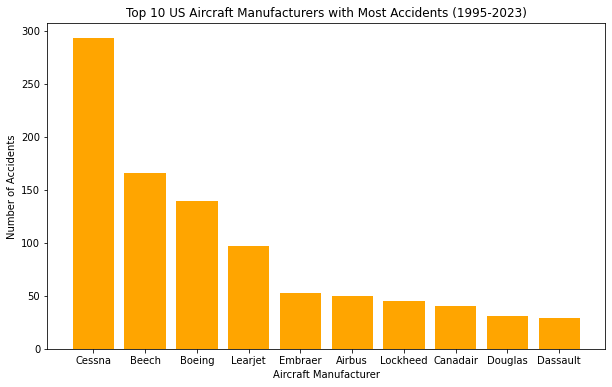

In [530]:
USA_airplanes_25_years = USA_25_years['Manufacturer'].value_counts()
top_10_USA_airplanes = USA_airplanes_25_years.iloc[:10]

#Show with a bar chart.
plt.figure(figsize=(10,6))
plt.bar(top_10_USA_airplanes.index, top_10_USA_airplanes.values, color='orange')
plt.xlabel('Aircraft Manufacturer')  
plt.ylabel('Number of Accidents')
plt.title('Top 10 US Aircraft Manufacturers with Most Accidents (1995-2023)')

So, what about the aircrafts with the most fatalities in the past 25 years??

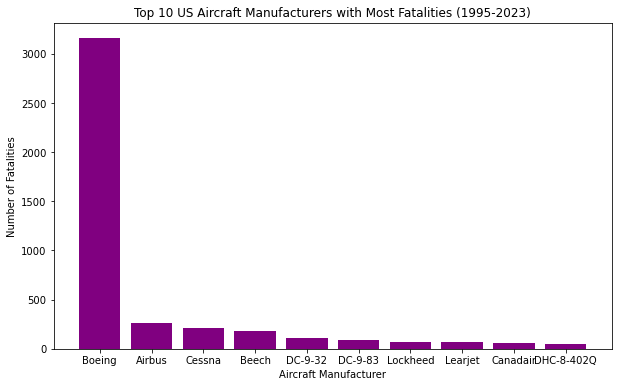

In [531]:
USA_airplane_fatalities_25_years = USA_25_years.groupby('Manufacturer')['fatalities'].sum().sort_values(ascending=False)
top_US_airplane_fatalities = USA_airplane_fatalities_25_years.iloc[:10]

#On a bar chart
plt.figure(figsize=(10,6))
plt.bar(top_US_airplane_fatalities.index, top_US_airplane_fatalities.values, color='purple')
plt.xlabel('Aircraft Manufacturer')      
plt.ylabel('Number of Fatalities')
plt.title('Top 10 US Aircraft Manufacturers with Most Fatalities (1995-2023)')
plt.show()

This led to my next conundrum on whether I can overlay the number of accidents with the number of fatalities.


Therefore I decided to create a dataframe with Manufacturer, the sum of accidents and sum of fatalities as the columns


In [532]:
joined_data = pd.concat([USA_airplanes_25_years, USA_airplane_fatalities_25_years], axis=1, join='inner')
joined_data.columns = ['Number of Accidents', 'Number of Fatalities']
joined_data 

,Number of Accidents,Number of Fatalities
Cessna,293,209
Beech,166,179
Boeing,139,3160
Learjet,97,66
Embraer,53,46
...,...,...
DC,1,0
Ilyushin,1,0
Volpar,1,1
Bushmaster,1,0


This warranted me to make a bar and line graph combo to show accidents as the bar and fatalities as the line.

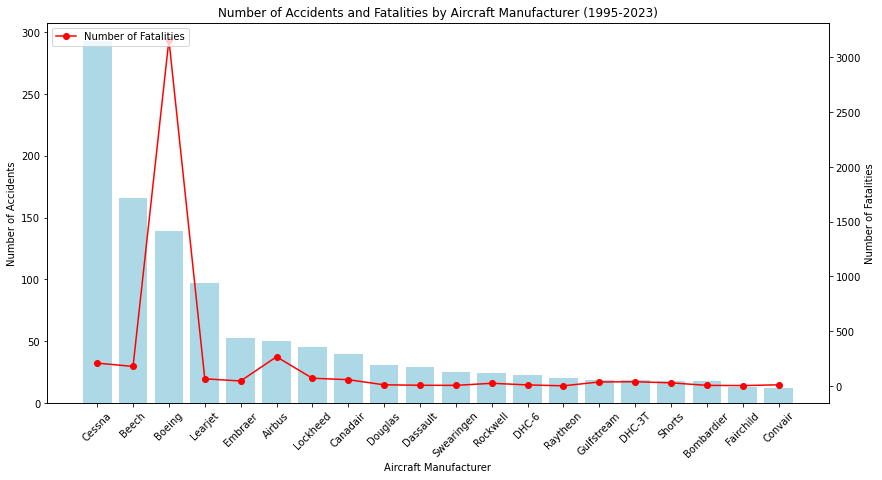

In [533]:
joined_data = joined_data.iloc[:20]

plt.figure(figsize=(14,7))
plt.bar(joined_data.index, joined_data['Number of Accidents'], color='lightblue', label='Number of Accidents')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents and Fatalities by Aircraft Manufacturer (1995-2023)')
plt.xticks(rotation=45) 
plt.twinx()
plt.plot(joined_data.index, joined_data['Number of Fatalities'], color='red', marker='o', label='Number of Fatalities')
plt.ylabel('Number of Fatalities')  
plt.legend(loc='upper left')
plt.show()

I decided to check on the operators so as to determine which had the highest number of accidents.
This will aid in drafting a stable conclusion based off my data

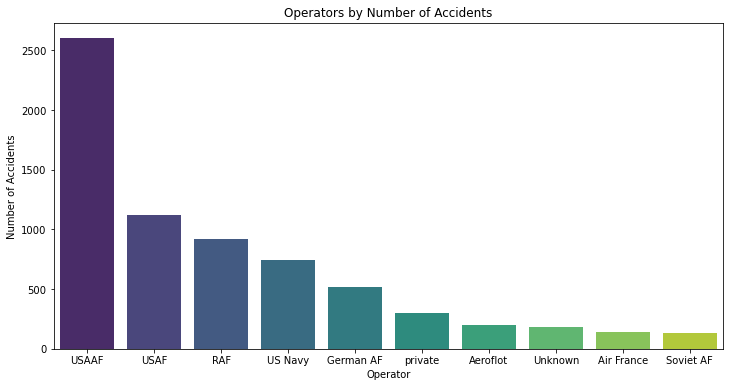

In [534]:
#plotting operator against accidents
operator_counts = data['operator'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=operator_counts.index, y=operator_counts.values, palette='viridis')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.title('Operators by Number of Accidents')
plt.show()

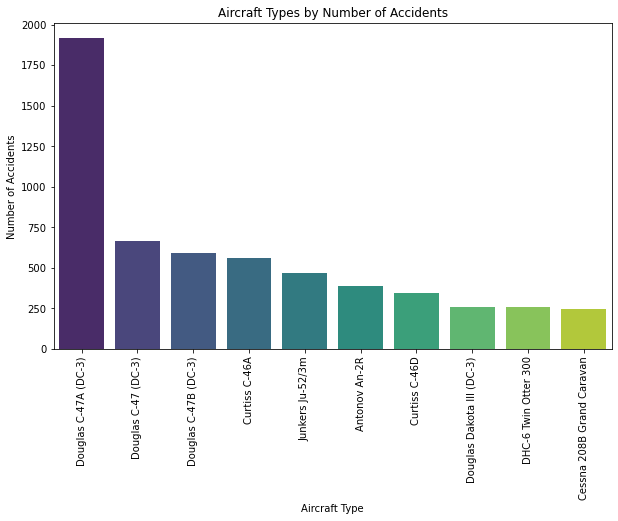

In [535]:
#plotting type of aircraft against accidents caused
aircraft_counts = data['type'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette='viridis')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.title('Aircraft Types by Number of Accidents')
plt.xticks(rotation=90)
plt.show()

In [536]:
data.to_csv('cleaned_aviation_data.csv', index=False)

# CONCLUSION

Based on my findings, there was a high accident rate between 1939-1945 majorly due to World War II (WWII).

This is also backed up by the high number of accidents by the USSAF and USAF operators majorly because they took part in the world war.

Accidents and fatalities in aviation have decreased over time thanks to new technology and better safety standards. This makes the industry less risky and more profitable for companies to enter.

The company should avoid Douglas aircraft, as they have historically had the highest accident rates. While all models carry some risk, the Douglas is especially unsafe, partly because it was originally built for war and only later adapted for commercial use.

Douglas planes also show higher fatality numbers because they carry more passengers as commercial airliners. By contrast, private operators face lower risks, which benefits the company’s plan.

Finally, while some regions like the USA and Russia show higher accident rates, this is influenced by war and other external factors. The company should balance geography, profitability, and safety when choosing the best low-risk aircraft.